In [1]:
from neuron import n
import numpy as np

In [2]:
from neuron.units import ms, mV, µm

In [3]:
# --- 1. Simulation Parameters ---
n.load_file("stdrun.hoc")
SIM_DUR = 500 # ms

# --- 2. Network Parameters ---
N_E = 100  # Number of excitatory neurons
N_I = 25   # Number of inhibitory neurons
N_INPUT = 100 # Number of external input sources
SPACE_EXTENT = 100  # um, extent of the 1D space

# --- 3. Neuron and Synapse Parameters ---
# Leaky Integrate-and-Fire (LIF) parameters
LIF_TAU = 20.0    # Membrane time constant (ms)
LIF_V_REST = -65.0 # Resting potential (mV)
LIF_V_RESET = -65.0 # Reset potential (mV)
LIF_V_THRESH = -50.0 # Firing threshold (mV)
LIF_R = 10.0 # Membrane resistance (Mohm)

seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
seg.hh.gl = 0.0003  # Leak conductance in S/cm2
seg.hh.el = -54.3 * mV  # Reversal potential


# Synaptic parameters
E_SYN_TAU1 = 0.2  # Excitatory synapse rise time (ms)
E_SYN_TAU2 = 3.0   # Excitatory synapse decay time (ms)
I_SYN_TAU1 = 0.5  # Inhibitory synapse rise time (ms)
I_SYN_TAU2 = 10.0  # Inhibitory synapse decay time (ms)

# STDP parameters (for E -> I connections)
STDP_TAU_PLUS = 20  # ms
STDP_TAU_MINUS = 20 # ms
STDP_A_PLUS = 0.01  # LTP strength
STDP_A_MINUS = 0.012 # LTD strength
W_MAX = 0.01        # Maximum synaptic weight

1.0

In [7]:
# --- 4. Neuron Class Definitions ---

class ENeuron:
    """Two-compartment Excitatory Neuron (soma + dendrite)."""
    def __init__(self, gid, x_pos):
        self.x = x_pos
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()

    def _setup_morphology(self):
        self.soma = n.Section("soma", self)
        self.dend = n.Section("dend", self)
        self.dend.connect(self.soma(1))
        self.all = self.soma.wholetree()
        self.soma.L = self.soma.diam = 12.6157 * µm
        self.dend.L = 100 * µm
        self.dend.diam = 1 * µm

    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
        self.soma.insert(n.hh)
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003  # Leak conductance in S/cm2
            seg.hh.el = -54.3 * mV  # Reversal potential
        # Insert hh channels in the dendrite
        self.dend.insert(n.hh)
        for seg in self.dend: 
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003  # Leak conductance in S/cm2
            seg.hh.el = -54.3 * mV  # Reversal potential

    def __repr__(self):
        return "ENeuron[{}]".format(self._gid)


my_cell = BallAndStick(0)

AttributeError: '_NEURON_INTERFACE' object has no attribute 'lif'

In [15]:
?n

Call signature: n(*args, **kwargs)
Type:           _NEURON_INTERFACE
String form:    <TopLevelNEURONInterface>
File:           ~/anaconda3/envs/Neuron/lib/python3.10/site-packages/neuron/__init__.py
Docstring:     
neuron.n

neuron.n is the top-level NEURON inteface, starting in NEURON 9.

>>> from neuron import n
>>> n
<TopLevelNEURONInterface>

Most NEURON classes and functions are defined in the n namespace
and can be accessed as follows:

>>> v = n.Vector(10)
>>> soma = n.Section("soma")
>>> input = n.IClamp(soma(0.5))
>>> n.finitialize(-65)

Each built-in class has its own type, so for the above definitions we have:

>>> type(v)
<class 'hoc.Vector'>
>>> type(soma)
<class 'nrn.Section'>

But since ``IClamp`` is defined by a MOD file:

>>> type(input)
<class 'hoc.HocObject'>

Other submodules of neuron exist, including rxd and units.

You can see the functions, classes, etc available inside n via dir(n)
and can get help on each via the standard Python help system, e.g.,

>>> help(n.

In [7]:
my_cell.dend.nseg = 101
my_cell.soma.nseg = 3

In [8]:
n.topology()


|---|       BallAndStick[0].soma(0-1)
     `----------------------------------------------------------------------------------------------------|       BallAndStick[0].dend(0-1)



1.0

In [20]:
print(n.units("gnabar_hh"))

S/cm2


In [9]:
for sec in n.allsec():
    print("%s: %s" % (sec, ", ".join(sec.psection()["density_mechs"].keys())))

BallAndStick[0].soma: hh
BallAndStick[0].dend: pas


In [10]:
n.psection()

BallAndStick[0].soma { nseg=3  L=12.6157  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert hh { gnabar_hh=0.12 gkbar_hh=0.036 gl_hh=0.0003 el_hh=-54.3}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
	insert capacitance { cm=1}
	insert morphology { diam=12.6157}
}


1.0

In [11]:
from neuron import gui

ps = n.PlotShape(True)
ps.show(0)

1

In [ ]:
import matplotlib.pyplot as plt

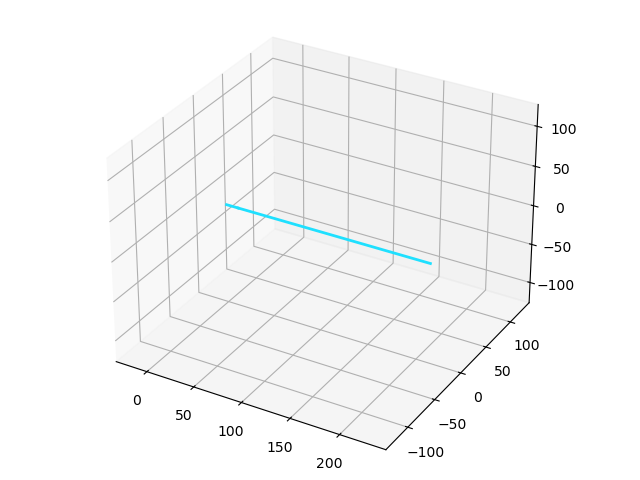

In [12]:
ps = n.PlotShape(True).plot(plt)

In [1]:
stim = n.IClamp(my_cell.dend(1))
stim.get_segment()
stdp = n.STDP(syn)

NameError: name 'n' is not defined

In [28]:
print(", ".join(item for item in dir(stim) if not item.startswith("__")))

amp, baseattr, delay, dur, get_loc, get_segment, has_loc, hname, hocobjptr, i, loc, same


In [13]:
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

In [41]:
soma_v = n.Vector().record(my_cell.soma(0.9)._ref_v)
t = n.Vector().record(n._ref_t)

In [15]:
n.finitialize(-65 * mV)

1.0

In [16]:
n.continuerun(25 * ms)

0.0

In [17]:
from bokeh.io import output_notebook
import bokeh.plotting as plt

output_notebook()

Loading BokehJS ...

In [18]:
f = plt.figure(x_axis_label="Time (ms)", y_axis_label="Membrane potential (mV)")
f.line(t, soma_v, line_width = 2)
plt.show(f)

In [ ]:
dend_v = [n.Vector().record(my_cell.dend(iseg)._ref_v) for iseg in np.linspace(0,1,101)]
n.finitialize(-65)
n.continuerun(25)

In [40]:
dend_v
t

Vector[4]

In [32]:
f = plt.figure(x_axis_label="t (ms)", y_axis_label="v (mV)")
Locs = range(101)
for iseg in Locs:
    f.line(t, soma_v, line_width = 2)
    f.line(t, list(dend_v[iseg]), line_width=1, line_dash="dashed")
plt.show(f)

In [37]:
f = plt.figure(x_axis_label="Loc on dendrite (µm)", y_axis_label="v (mV)")
Locs = np.linspace(0,1,101) * my_cell.dend.L
for ti in range(107):
    f.line(Locs, list(dend_v[,][ti]), line_width=1, line_dash="dashed")
plt.show(f)

SyntaxError: invalid syntax (2107852399.py, line 4)

In [34]:
Locs = np.linspace(0,1,101) * my_cell.dend.L
Locs

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])